#### Classification | Model

# Predicting Heart Disease  

## Classification Model Stepwise Analysis <a id='top'></a> 

1. [Research Question](#1)<br/>
2. [DataFrames](#2) <br/>
3. [Exporatory Data Analysis](#3)<br/>
    Summarize<br/>
    Classification Viability<br/>
    Classification Metrics<br/>
4. [Baselining](#4)<br/>
5. [Validation](#5)<br/>
6. [Model Iterations](#6) <br/>
    model 1<br/>
    model 1<br/>
    model 1<br/>
    model 1<br/>
    model 1<br/>
    model 1<br/>
    Feature Engineering<br/>
    Class Imbalance<br/>
7. [Model Selection ](#7)<br/>



In [1]:
import pandas as pd
import numpy as np
import imblearn.over_sampling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) 

from ipywidgets import interactive, FloatSlider
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.compose import make_column_transformer
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC ,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from xgboost import XGBClassifier

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

iris_dataset = datasets.load_iris()


## 1 | Research Design<a id='1'></a> 

* **Reserach Question:** How might we predict which patients are at high risk of heart disease?
* **Impact Hypothesis:** Reduce the number of patients who develop heart disease (arterial plaque or heart attack).
* **Data source:** [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), n=319,795
* **Error metric:** [Recall](#3c) and [ROC AUC](#3c)

#### [Data Dictionary](https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf)<a id='1a'></a>
_Target_
- `y_heart_disease`: Y/N | coronary heart disease (CHD) or myocardial infarction (MI)

_Health Behaviors_
- `behavior_activity`: Num (0-30) | # days did physical activity/ exercise other than regular job
- `behavior_alcohol`: Y/N | heavy drinker, defined as men: 14+/wk, women: 7+/wk (includes beer, wine, malt beverage, liquor)
- `behavior_sleep`: Num (0-24) | # hours of sleep in a 24-hour period, on average
- `behavior_tobacco`: Y/N | smoked at least 100 cigarettes in your life

_Demographics_
- `demg_age`: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80+
- `demg_gender`: male/female
- `demg_race`: White, Black, Asian, American Indian/Alaskan Native, Hispanic, Other race

_Health Measures_
- `health_bmi`: Num | Body Mass Index (BMI)
- `health_physical`: Num (0-30) | # days physical health  not good, includes physical illness and injury
- `health_mental`: Num (0-30 ) | # days mental health not good, includes stress, depression, and problems with emotions
- `health_general`: Excellent, Very Good, Fair, Poor | Would you say that in general your health is...
- `health_mobility`: Y/N | serious difficulty walking or climbing stairs

_Chronic Disease_
- `disease_asthma`: Y/N
- `disease_diabetes`: Y/N/Y pregnancy/N borderline
- `disease_kidney`: Y/N | kidney disease, excludes kidney stones, bladder infection or incontinence
- `disease_skin`: Y/N | skin cancer
- `disease_stroke`: Y/N

[back to top](#top)

## 2 | [DataFrames](https://github.com/slp22/classification-project/blob/main/classification-heart-disease_mvp.ipynb)<a id='2'></a>  


In [3]:
# load clean and transformed dataframes from mvp 
heart_disease_df = pd.read_csv('heart_disease_df.csv')
heart_disease_df_map = pd.read_csv('heart_disease_df_map.csv') 


In [ ]:
# clean df
heart_disease_df.head(3)


In [109]:
# transformed df: mapped categorical variables to numerical values 
heart_disease_df_map.head(3)


,behavior_activity,behavior_alcohol,behavior_sleep,behavior_tobacco,demg_age,demg_gender,demg_race,disease_asthma,disease_diabetes,disease_kidney,disease_skin,disease_stroke,health_bmi,health_general,health_mental,health_mobility,health_physical,y_heart_disease
0,1,0,5.0,1,55,1,6,1,1,0,1,0,16.60,4,30.0,0,3.0,0
1,1,0,7.0,0,80,1,6,0,0,0,0,1,20.34,4,0.0,0,0.0,0
2,1,0,8.0,1,65,2,6,1,1,0,0,0,26.58,2,30.0,0,20.0,0


[back to top](#top)

## 3 | Exporatory Data Analysis<a id='3'></a> 

#### Using `heart_disease_df_map` with mapped variables for modeling.
##### Note: Full EDA part of [MVP](https://github.com/slp22/classification-project/blob/main/classification-heart-disease_mvp.ipynb).

### 3.1 Summarize data<a id='31'></a> 

In [ ]:
# dataframe info
heart_disease_df_map.info()


#### No missing data, all data types are numerical.

[back to top](#top)

### 3.2 Classification viability<a id='32'></a> 

In [ ]:
# descriptive statistics
heart_disease_df_map.describe().T.style.background_gradient(cmap='Blues')


In [ ]:
# correlation matrix
heart_disease_df_map.corr().style.background_gradient(cmap='Blues')


#### A classification model is viable.

[back to top](#top)

In [ ]:
# target vs age
ax = sns.boxplot(x='y_heart_disease', y='demg_age', data=heart_disease_df_map)
ax.set_xticklabels(['No', 'Yes']);


In [ ]:
# target vs mobility
sns.boxplot(x='y_heart_disease', y='health_bmi', data=heart_disease_df_map)
ax.set_xticklabels(['No', 'Yes']);


In [ ]:
# target vs physical health
sns.boxplot(x='y_heart_disease', y='health_physical', data=heart_disease_df_map)
ax.set_xticklabels(['No', 'Yes']);


In [ ]:
# target distribution
print('Positives/Negatives Ratio:', round(27373/292422, 4) * 100, '%')
print(heart_disease_df['y_heart_disease'].value_counts())


[back to top](#top)

### 3.3 Classification metrics<a id='33'></a> 

* **Recall** to maximize on patients who are true positives for heart disease.
* **ROC AUC** to identify high vs low risk patients. 

[back to top](#top)

## 4 | Baseline<a id='4'></a> 

#### Logistic regression with three features based on correlation matrix.

In [ ]:
# separate target from features based on the correlation matrix
y_base = heart_disease_df_map['y_heart_disease'] 
X_base = heart_disease_df_map.loc[:, [
#     'behavior_activity', 
#     'behavior_alcohol', 
#     'behavior_sleep',
#     'behavior_tobacco',
    'demg_age',
#     'demg_gender', 
#     'demg_race',
#     'disease_asthma', 
#     'disease_diabetes', 
#     'disease_kidney', 
#     'disease_skin', 
#     'disease_stroke', 
#     'health_bmi', 
#     'health_general', 
#     'health_mental',
    'health_mobility', 
    'health_physical'
    ]]

# split baseline data test/train/validate
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base,
                                                                        y_base,
                                                                        test_size=0.2,
                                                                        random_state=42)
X_train_base, X_validate_base, y_train_base, y_validate_base = train_test_split(X_train_base, 
                                                                                y_train_base, 
                                                                                test_size = .25, 
                                                                                random_state = 42)

# scale baseline X train/test
scaler = StandardScaler()
X_train_scaled_base = scaler.fit_transform(X_train_base)
X_test_scaled_base = scaler.transform(X_test_base)
X_validate_scaled_base = scaler.transform(X_validate_base)


In [ ]:
# baseline logistic regression X train scaled & y train
log_reg_base = LogisticRegression().fit(X_train_scaled_base, y_train_base)

# baseline predict on X_validate_scaled_m 
y_pred_base = logreg_base.predict(X_validate_scaled_base) 


# score on X_test_scaled and y_test
print("Baseline logistic regression recall:", round(
    recall_score(log_reg_base.predict(X_validate_scaled_base), y_validate_base), 4))

print("Baseline logistic regression ROC AUC score (val):",  round(
    roc_auc_score(y_validate_base, log_reg_base.predict_proba(X_validate_scaled_base)[:,1]), 4))



[back to top](#top)

## 5 | Validation<a id='5'></a>

#### Validation and testing scheme to use in [model selection](#7). 

In [25]:
# separate target from features 
y = heart_disease_df_map['y_heart_disease'] 
X = heart_disease_df_map.loc[:, [
    'behavior_activity', 
    'behavior_alcohol', 
    'behavior_sleep',
    'behavior_tobacco',
    'demg_age',
    'demg_gender', 
    'demg_race',
    'disease_asthma', 
    'disease_diabetes', 
    'disease_kidney', 
    'disease_skin', 
    'disease_stroke', 
    'health_bmi', 
    'health_general', 
    'health_mental',
    'health_mobility', 
    'health_physical'
    ]]

# split data test/train/validate
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            test_size = .25, 
                                                            random_state = 42)

# scale X train/test/validate
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)


[back to top](#top)

## 6 | Model Iterations <a id='6'></a> 

- Starting from the baseline and in an iterative, validated loop ask: 
    - Do you need more complexity or less (underfitting vs. overfitting)? 
    - Do you need a fancier model (nonlinear, additional feature engineering / transformations)? 
    - If you need more complexity, try tree-based models such as random forest or gradient boosted trees. 
    - Are you overfitting and need to make your model more conservative by removing features or using regularization? - Hopefully you can quickly acquire an understanding of which direction you need to go in from your baseline and early modeling results, then make more fine-tuned changes as you go.


- The impact of model choices should be consistently measured against the same validation data as in part 3, using your relevant classification performance metrics such as F1 or ROC AUC. 


[back to top](#top)

### 6.1 k-Nearest Neighbors<a id='61'></a> 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
# print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))



[back to top](#top)

### 6.2 Logistic Regression<a id='62'></a> 

In [7]:
log_reg = LogisticRegression().fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_validate_scaled) 

print("Logistic regression recall score (val):", round(
    recall_score(log_reg.predict(X_validate_scaled), y_validate), 4))
print("Logistic regression ROC AUC score (val):",  round(
    roc_auc_score(y_validate, log_reg.predict_proba(X_validate_scaled)[:,1]), 4))



Logistic regression recall score (val): 0.5195
Logistic regression ROC AUC score (val): 0.8411


Logistic regression maybe [model winner](#7), recall score improved from [baseline](#4).<br/>


[back to top](#top)

### 6.3 Decision Trees<a id='63'></a> 

In [ ]:
# tree max depth 2
dt = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_validate)

print("Decision tree (depth=2) recall (val):", round(
    recall_score(dt.predict(X_validate), y_validate), 4))
tree.plot_tree(dt);

In [ ]:
# tree max depth 4
dt = DecisionTreeClassifier(max_depth=4,criterion="entropy")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_validate)

print("Decision tree (depth=4) recall score (val):", round(
    recall_score(dt.predict(X_validate), y_validate), 4))
tree.plot_tree(dt);

### 6.4 Random Forests <a id='64'></a> 

In [ ]:
forest = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = forest.predict(X_validate)

print("Random forestes recall score (val):", round(
    recall_score(forest.predict(X_validate), y_validate), 4))


Random forest model performs worse than [logistic regression](#6b). 

[back to top](#top)

### 6.5 Gradient Boosted Trees: xgboost<a id='65'></a> 

In [ ]:
### code block

[back to top](#top)

### 6.6 Ensemble<a id='66'></a> 

In [110]:
### code block

[back to top](#top)

### 6.7. Naive Bayes<a id='67'></a> 

In [ ]:
# BernoulliNB() 
nb = BernoulliNB().fit(X_train_scaled, y_train)
y_predict_nb = nb.predict(X_validate_scaled) 
print("Bernoulli NB recall score (val):", round(
    recall_score(nb.predict(X_validate), y_validate), 4))


[back to top](#top)

### 6.8 Feature Engineering <a id='68'></a> 

### New features: [data dictionary](#1a) groups

In [ ]:
# 1 behaviors = phyiscial activity days/month, sleep time hrs/day,  alcohol, and tobacco use
heart_disease_df_map['behaviors'] = (
    heart_disease_df_map['behavior_activity'] +
    heart_disease_df_map['behavior_alcohol'] +  
    heart_disease_df_map['behavior_sleep'] +
    heart_disease_df_map['behavior_tobacco'])

# 2 demographics = age, gender, race
heart_disease_df_map['demographics'] = (
    heart_disease_df_map['demg_age'] +
    heart_disease_df_map['demg_gender'] +  
    heart_disease_df_map['demg_race'])

# 3 disease = asthma, diabetes, kidney, skin cancer, stroke
heart_disease_df_map['disease'] = (
    heart_disease_df_map['disease_asthma'] +
    heart_disease_df_map['disease_diabetes'] +  
    heart_disease_df_map['disease_kidney'] +
    heart_disease_df_map['disease_skin'] +
    heart_disease_df_map['disease_stroke'])

# 4 health (measures) = asthma, diabetes, kidney, skin cancer, stroke
heart_disease_df_map['measures'] = (
    heart_disease_df_map['health_bmi'] +
    heart_disease_df_map['health_general'] +  
    heart_disease_df_map['health_mental'] +
    heart_disease_df_map['health_mobility'] +
    heart_disease_df_map['health_physical'])

heart_disease_df_map.columns


### Logistic regression: data dictionary groups<a id='682'></a> 

In [ ]:
# separate target from engineered features: y/X_f
y_f = heart_disease_df_map['y_heart_disease'] 
X_f = heart_disease_df_map.loc[:, ['behaviors', 
                                   'demographics', 
                                   'disease', 
                                   'measures']]

# split data test/train/validate
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, 
                                                    y_f, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train_f, X_validate_f, y_train_f, y_validate_f = train_test_split(X_train_f, 
                                                                    y_train_f, 
                                                                    test_size = .25, 
                                                                    random_state = 42)
# scale X train/test/validate
scaler = StandardScaler()
X_train_f_scaled = scaler.fit_transform(X_train_f)
X_test_f_scaled = scaler.transform(X_test_f)
X_validate_f_scaled = scaler.transform(X_validate_f)


In [ ]:
# LR only engineered features
log_reg_f = LogisticRegression().fit(X_train_f_scaled, y_train_f)
y_pred_f = log_reg_f.predict(X_validate_f_scaled) 
print("Logistic regression only engineered features recall:", round(
    recall_score(log_reg_f.predict(X_validate_f_scaled), y_validate_f), 4))


Logistic regression with only engineered features performs worse than first iteration of [logistic regression](#6b). 

### New features: risk factors

In [ ]:
# risk factors = 
    heart_disease_df_map['risk_factors'] = (
    heart_disease_df_map[''] +
    heart_disease_df_map[''] +  
    heart_disease_df_map[''] +
    heart_disease_df_map[''])

heart_disease_df_map.columns


### Logistic regression: risk factors 


In [ ]:
# separate target from engineered features: y/X_rf
y_rf = heart_disease_df_map['y_heart_disease'] 
X_rf = heart_disease_df_map.loc[:, ['behaviors', 
                                   'demographics', 
                                   'disease', 
                                   'measures']]

# split data test/train/validate
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, 
                                                    y_rf, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train_rf, X_validate_rf, y_train_rf, y_validate_rf = train_test_split(X_train_rf, 
                                                                        y_train_rf, 
                                                                        test_size = .25, 
                                                                        random_state = 42)
# scale X train/test/validate
scaler = StandardScaler()
X_train_rf_scaled = scaler.fit_transform(X_train_rf)
X_test_rf_scaled = scaler.transform(X_test_rf)
X_validate_rf_scaled = scaler.transform(X_validate_rf)


In [ ]:
# LR risk factor features
log_reg_rf = LogisticRegression().fit(X_train_rf_scaled, y_train_rf)
y_pred_rf = log_reg_rf.predict(X_validate_rf_scaled) 
print("Logistic regression only engineered features recall:", round(
    recall_score(log_reg_rf.predict(X_validate_rf_scaled), y_validate_rf), 4))


Logistic regression with risk factor features performs `better/worse` than [logistic regression ...](#6..) and `better/worse` than [logistic regression ...](#6..). 
    

[back to top](#top)

### Logistic regression: data dictionary groups + risk factors features<a id='683'></a> 

In [112]:
# separate target from original + engineered features: y/X_new
y_new = heart_disease_df_map['y_heart_disease'] 
X_new = heart_disease_df_map.loc[:, [
    'behaviors', 
    'demographics', 
    'disease', 
    'measures',
    'behavior_activity', 
    'behavior_alcohol', 
    'behavior_sleep',
    'behavior_tobacco',
    'demg_age',
    'demg_gender', 
    'demg_race',
    'disease_asthma', 
    'disease_diabetes', 
    'disease_kidney', 
    'disease_skin', 
    'disease_stroke', 
    'health_bmi', 
    'health_general', 
    'health_mental',
    'health_mobility', 
    'health_physical'
    ]]

# split data test/train/validate
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, 
                                                    y_new, 
                                                    test_size=0.2, 
                                                    random_state=42)
X_train_new, X_validate_new, y_train_new, y_validate_new = train_test_split(X_train_new, 
                                                                            y_train_new, 
                                                                            test_size = .25, 
                                                                            random_state = 42)

# Scale X train/test/validate
scaler = StandardScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)
X_validate_new_scaled = scaler.transform(X_validate_new)


In [ ]:
# LR original + engineered features
log_reg_ff = LogisticRegression().fit(X_train_ff_scaled, y_train_ff)
y_pred_ff = log_reg_ff.predict(X_validate_ff_scaled) 
print("Logistic regression recall:", round(
    recall_score(log_reg_ff.predict(X_validate_ff_scaled), y_validate_ff), 4))


Logistic regression with original + engineered features performs better than [logistic regression model with only engineered features](#6h1) and the same as the first iteration of [logistic regression](#6b). 

[back to top](#top)

## Class Imblance Handling <a id='6g'></a> 

In [ ]:
# target imbalance
heart_disease_df_map.y_heart_disease.value_counts()

In [ ]:
# resample?

In [ ]:
# class_weight adjustments
# _sklearn fbeta score – f2 or f3 to upweight recall_

In [ ]:
# decision threshold to max recall

[back to top](#top)

## 7 | Model Selection<a id='7'></a> 

#### Model winner: [logistic regression](#6b), validate and test using [scheme](#5) presented above. 

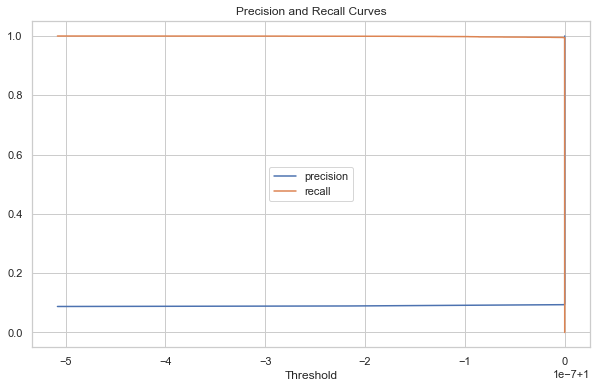

In [98]:
# precision and recall curves

precision_curve, recall_curve, threshold_curve = precision_recall_curve(
    y_test, log_reg.predict_proba(X_test)[:,1] )

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='center')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves')
plt.savefig("precision-recall-curves.jpeg");

### 7.1 Finalize and test<a id='71'></a> 

- When satisfied with the results of your tuning in _Model Iterations_, establish your final model choices:
        - features, 
        - preprocessing, 
        - imbalance handling strategy, and 
        - hyperparameters
    - retrain this model on all training + validation data. 
- Make predictions on the test data and score these predictions, reporting this score as your estimate of the model's generalization performance.


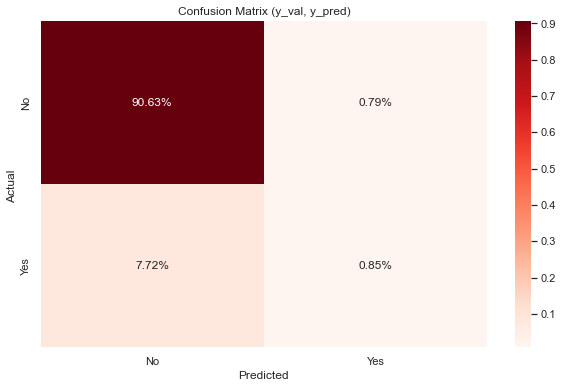

In [106]:
# Confusion matrix on y_validate, y_pred_log_reg
cm = confusion_matrix(y_validate, y_pred_log_reg)

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Reds')

ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

plt.title('Confusion Matrix (y_val, y_pred)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual ')

plt.savefig("confusion-matrix.jpeg");


In [10]:
# classification report on y_validate/predict
print(classification_report(y_validate, 
                            y_pred_log_reg, 
                            target_names=['no heart disease', 'yes heart disease']))



                   precision    recall  f1-score   support

 no heart disease       0.92      0.99      0.96     58473
yes heart disease       0.52      0.10      0.17      5486

         accuracy                           0.91     63959
        macro avg       0.72      0.55      0.56     63959
     weighted avg       0.89      0.91      0.89     63959



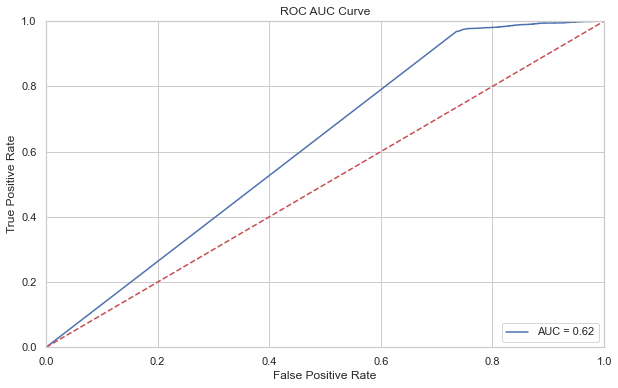

In [108]:
# ROC AUC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('ROC AUC Curve')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig("roc-auc-curve.jpeg");

In [59]:
# feature importance
imp_feat = pd.DataFrame()
feat = list(X)
imp = log_reg.coef_[0]
imp_feat['Feature'] = feat
imp_feat['Importance'] = imp
imp_feat.sort_values(by=['Importance'], ascending=False, inplace=True)


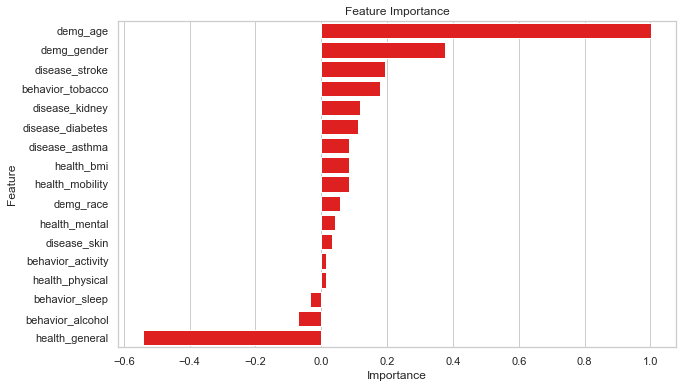

In [99]:
# vizualize feature importance
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=imp_feat, color='red');
plt.title('Feature Importance')

plt.savefig("feature-importance.jpeg");


### 7.2 Interpret<a id='72'></a> 

[back to top](#top)